In [44]:
import numpy as np
import matplotlib.pyplot as plt

### P1

(a) polynimial function

$$f(x) = x^3-x$$

this function arosses the x-axis at x=-1,0,1

(b) rigonometric function 

$$f(x)=sin(x)+cos(2x)$$

the function crosses the x-axis several times

(c) rational function

$$f(x)=\frac{x^2-1}{x^2+1}$$

this function is continuous over the entire interval as the denominator does not approach zero

(d) combination

$$f(x)=(x^3-x)+\frac{sin(x)+cos(2x)}{x^2+1}$$

In [45]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)

def f_polynomial(x):
    return x**3 - x

def f_trigonometric(x):
    return np.sin(x) + np.cos(2*x)

def f_rational(x):
    return (x**2 - 1) / (x**2 + 1)

def f_combination(x):
    return (x**3 - x) + (np.sin(x) + np.cos(2*x)) / (x**2 + 1)

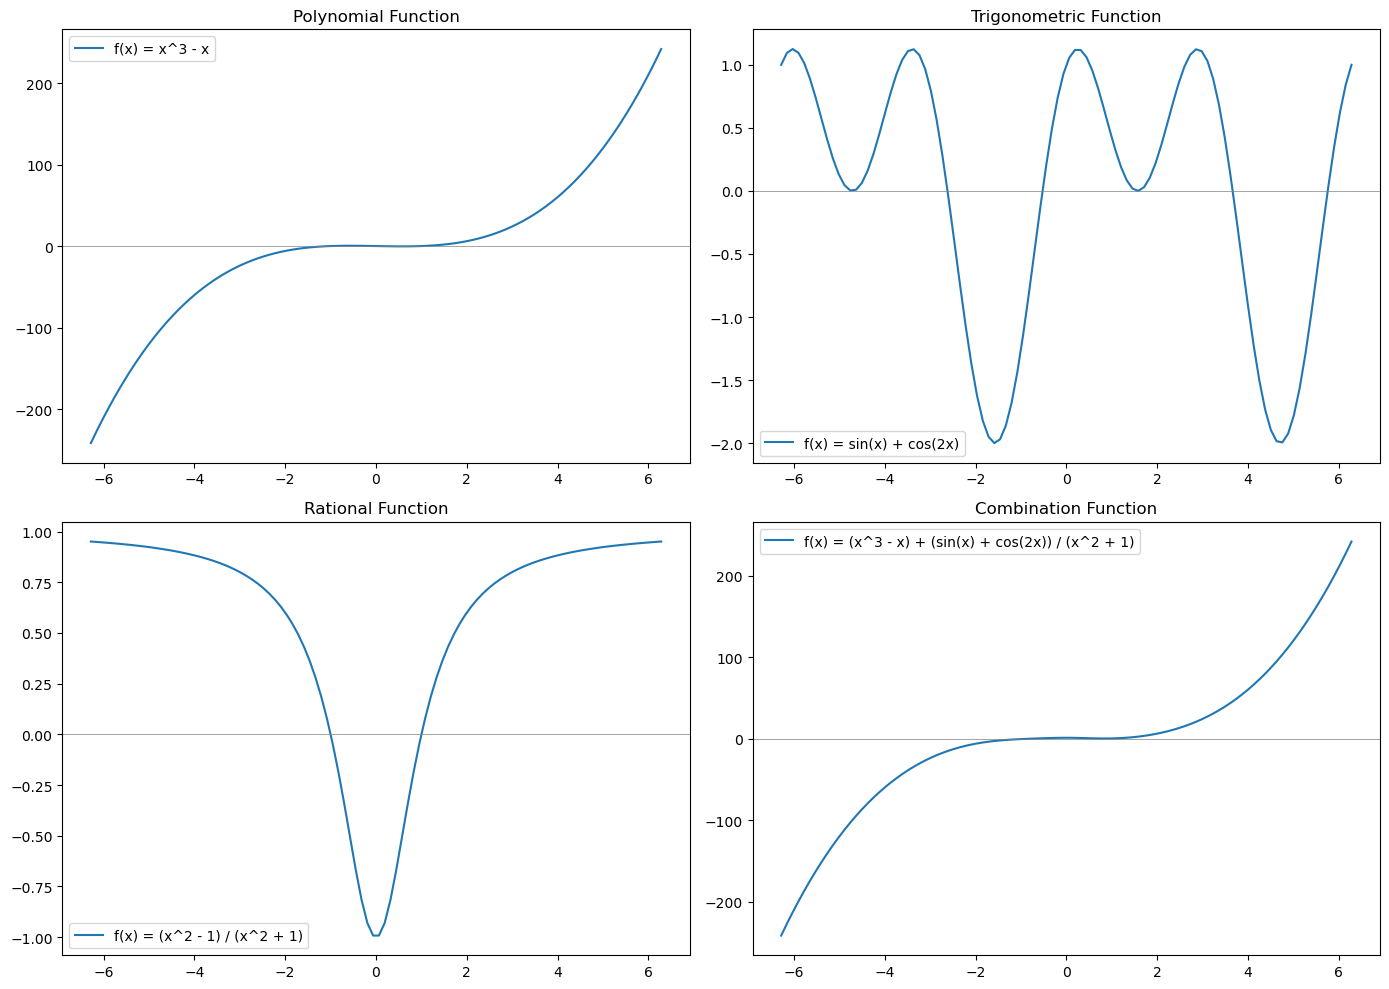

In [46]:
# plot
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax = ax.ravel()

ax[0].plot(x, f_polynomial(x), label='f(x) = x^3 - x')
ax[0].axhline(0, color='gray', lw=0.5)
ax[0].set_title('Polynomial Function')
ax[0].legend()

ax[1].plot(x, f_trigonometric(x), label='f(x) = sin(x) + cos(2x)')
ax[1].axhline(0, color='gray', lw=0.5)
ax[1].set_title('Trigonometric Function')
ax[1].legend()

ax[2].plot(x, f_rational(x), label='f(x) = (x^2 - 1) / (x^2 + 1)')
ax[2].axhline(0, color='gray', lw=0.5)
ax[2].set_title('Rational Function')
ax[2].legend()

ax[3].plot(x, f_combination(x), label='f(x) = (x^3 - x) + (sin(x) + cos(2x)) / (x^2 + 1)')
ax[3].axhline(0, color='gray', lw=0.5)
ax[3].set_title('Combination Function')
ax[3].legend()

plt.tight_layout()
plt.show()


### P2
Newton’s method

In [47]:
def newtons_method(f, df, x0, epsilon=1e-6, theta=1e-6, N=1000):
    xn = x0
    for n in range(N):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print(f"Root found: {xn} (|f(xn)| < epsilon), after {n} iters")
            return xn, n
        dfxn = df(xn)
        if dfxn == 0:
            print("Zero derivative. No solution found, after {n} iters")
            return None, n
        xn1 = xn - fxn / dfxn
        if abs(xn1 - xn) < theta:
            print(f"Root found: {xn1} (|xn1 - xn| < theta), after {n} iters")
            return xn1, n
        xn = xn1
    print("Maximum iterations reached. No solution found.")
    return None, N


def f(x):
    return x**3 - x

def df(x):
    return 3*x**2 - 1

x0s = [-2, 0, 0.5, 2]
results = [newtons_method(f, df, x0) for x0 in x0s]
results

Root found: -1.000000000002289 (|f(xn)| < epsilon), after 6 iters
Root found: 0 (|f(xn)| < epsilon), after 0 iters
Root found: -1.0 (|f(xn)| < epsilon), after 1 iters
Root found: 1.000000000002289 (|f(xn)| < epsilon), after 6 iters


[(-1.000000000002289, 6), (0, 0), (-1.0, 1), (1.000000000002289, 6)]

### P3
In general, it’s hard to always know a derivative of a function. Try exchanging the derivative with an approximation $f'(x) \approx (f (x + h) − f (x))/h$ . Experiment for all four functions from Task 1. Try different values of $x_0$.

In [48]:
def derivative_approx(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

functions = [f_polynomial, f_trigonometric, f_rational, f_combination]

all_results_individual = []
for func in functions:
    print(f"function: {func.__name__}")
    for x0 in x0s:
        newtons_method(func, lambda x: derivative_approx(func, x), x0=x0)
    print("----------------------------")


function: f_polynomial
Root found: -0.9999999999839292 (|f(xn)| < epsilon), after 6 iters
Root found: 0 (|f(xn)| < epsilon), after 0 iters
Root found: -1.0000000107993878 (|f(xn)| < epsilon), after 2 iters
Root found: 1.0000000000211 (|f(xn)| < epsilon), after 6 iters
----------------------------
function: f_trigonometric
Root found: -2.617993874131781 (|f(xn)| < epsilon), after 4 iters
Root found: -0.5235991534273352 (|f(xn)| < epsilon), after 4 iters
Root found: 1.5715481673741307 (|f(xn)| < epsilon), after 9 iters
Root found: 1.5715514360677152 (|f(xn)| < epsilon), after 9 iters
----------------------------
function: f_rational
Root found: 0.9999998231532771 (|f(xn)| < epsilon), after 8 iters
Zero derivative. No solution found, after {n} iters
Root found: 0.9999998907128281 (|f(xn)| < epsilon), after 3 iters
Root found: -0.9999998058589674 (|f(xn)| < epsilon), after 8 iters
----------------------------
function: f_combination
Root found: -0.7192024977313654 (|f(xn)| < epsilon), afte

### P4

Try a different approximation of a derivative: $f'(x)\approx(f (x + h) − f (x − h))/(2h)$.
Compare your results with the previous one. Try different values of $x_0$.

In [49]:
def derivative_approx_symmetric(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

all_results_symmetric = []
for func in functions:
    print(f"Testing function: {func.__name__} with symmetric derivative approximation")
    for x0 in x0s:
        newtons_method(func, lambda x: derivative_approx_symmetric(func, x), x0=x0)
    print("----------------------------")


Testing function: f_polynomial with symmetric derivative approximation
Root found: -1.000000000002289 (|f(xn)| < epsilon), after 6 iters
Root found: 0 (|f(xn)| < epsilon), after 0 iters
Root found: -1.0000000005896938 (|f(xn)| < epsilon), after 1 iters
Root found: 1.000000000002289 (|f(xn)| < epsilon), after 6 iters
----------------------------
Testing function: f_trigonometric with symmetric derivative approximation
Root found: -2.617993874455065 (|f(xn)| < epsilon), after 4 iters
Root found: -0.5235991563309043 (|f(xn)| < epsilon), after 4 iters
Root found: 1.571543276321873 (|f(xn)| < epsilon), after 9 iters
Root found: 1.5715464624904958 (|f(xn)| < epsilon), after 9 iters
----------------------------
Testing function: f_rational with symmetric derivative approximation
Root found: 0.9999998144074898 (|f(xn)| < epsilon), after 8 iters
Zero derivative. No solution found, after {n} iters
Root found: 0.9999998882941125 (|f(xn)| < epsilon), after 3 iters
Root found: -0.9999998144074898 (